In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random()) 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.3
dask                        2023.5.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.1
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite     

In [2]:
adata=sc.read_h5ad('/home/julia/data/placodes/h5ad/11_qc.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata.obs_names_make_unique()

normalizing counts per cell
    finished (0:00:02)


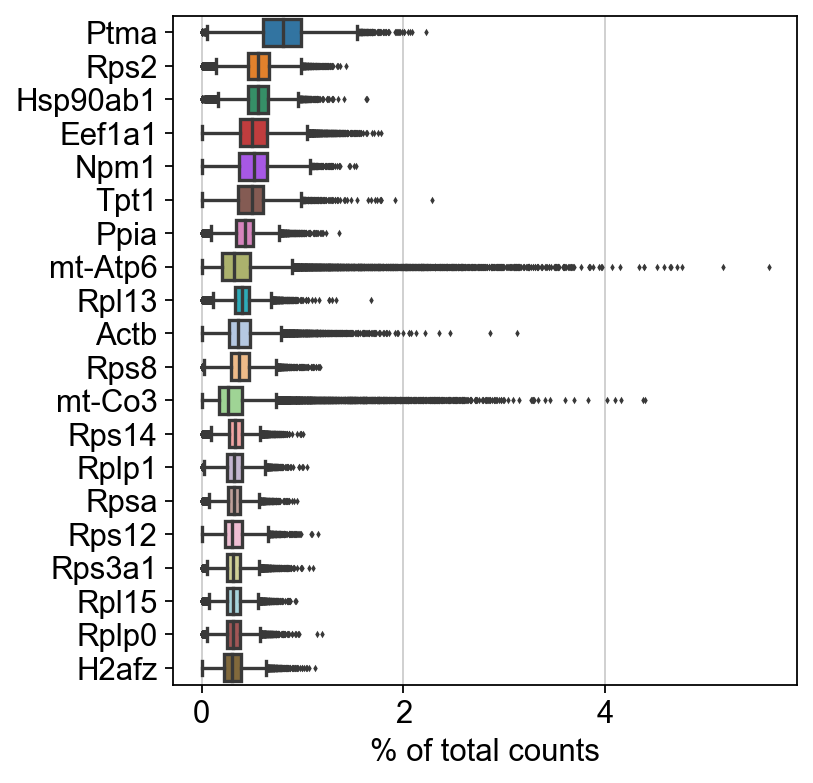

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_6362/3672494069.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1})
/tmp/ipykernel_6362/3672494069.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0], hist

Text(0.5, 1.0, 'Распределение процента митохондриальной экспрессии')

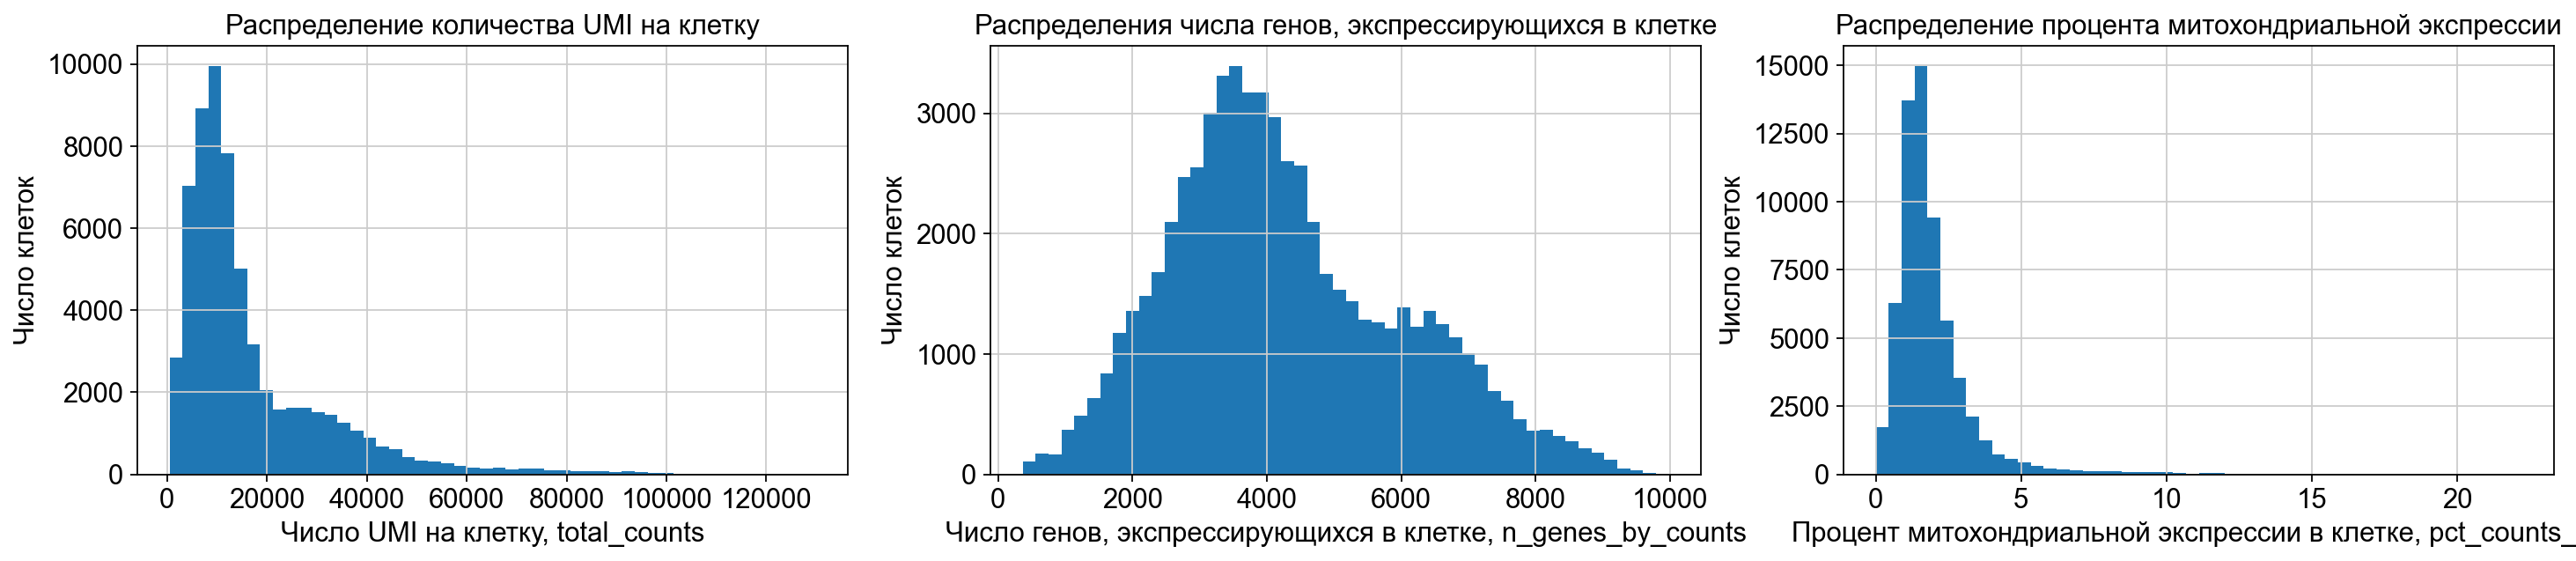

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение числа генов по клеткам
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1})
axs[1].set_xlabel("Число генов, экспрессирующихся в клетке, n_genes_by_counts")
axs[1].set_ylabel("Число клеток")
axs[1].set_title("Распределения числа генов, экспрессирующихся в клетке")

# Отрисовываем распределение общего числа UMI
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0], hist_kws={"alpha":1})
axs[0].set_xlabel("Число UMI на клетку, total_counts")
axs[0].set_ylabel("Число клеток")
axs[0].set_title("Распределение количества UMI на клетку")


# Отрисовываем распределение митохондриальной экспрессии
sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2], hist_kws={"alpha":1})
axs[2].set_xlabel("Процент митохондриальной экспрессии в клетке, pct_counts_mt")
axs[2].set_ylabel("Число клеток")
axs[2].set_title("Распределение процента митохондриальной экспрессии")

In [6]:
adata = adata[adata.obs.n_genes_by_counts > 1200, :]
adata = adata[adata.obs.total_counts < 40000, :]
adata = adata[adata.obs.pct_counts_mt < 6, :]

In [7]:
adata

View of AnnData object with n_obs × n_vars = 55025 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    layers: 'counts'

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:01)


In [9]:
sc.pp.log1p(adata)

In [10]:
sc.pp.highly_variable_genes(adata )


extracting highly variable genes
    finished (0:00:20)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


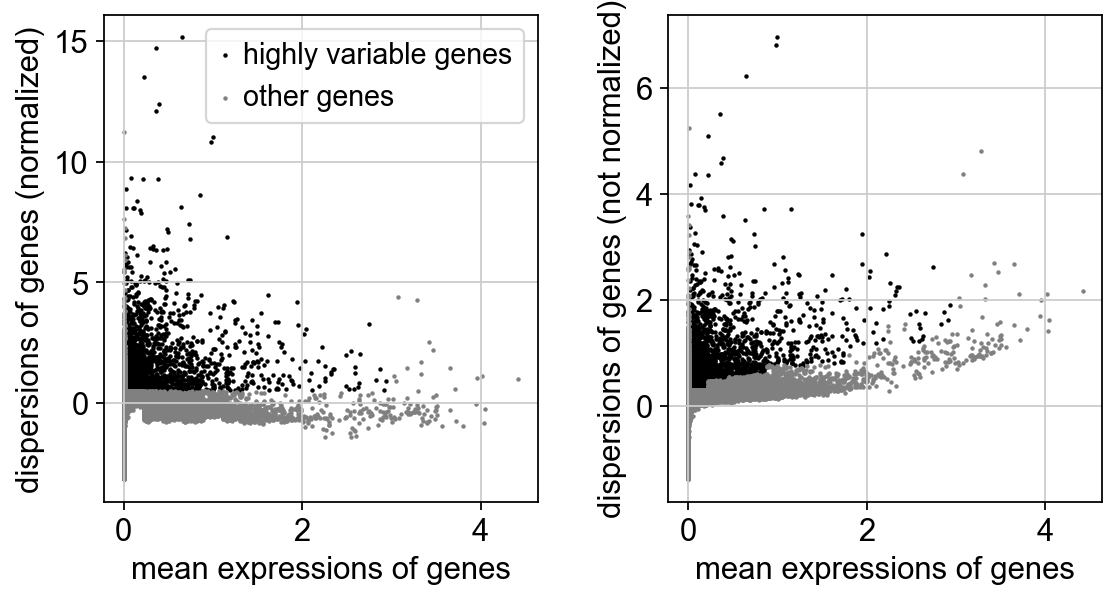

In [11]:
sc.pl.highly_variable_genes(adata)

In [12]:
adata.raw = adata

In [13]:
adata = adata[:, adata.var.highly_variable]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 55025 × 2695
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [15]:
sc.pp.scale(adata, max_value=10)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [16]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)


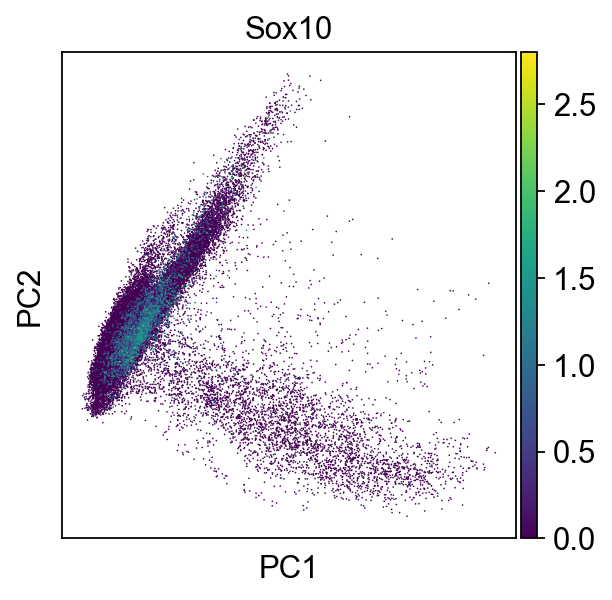

In [17]:
sc.pl.pca(adata, color='Sox10')

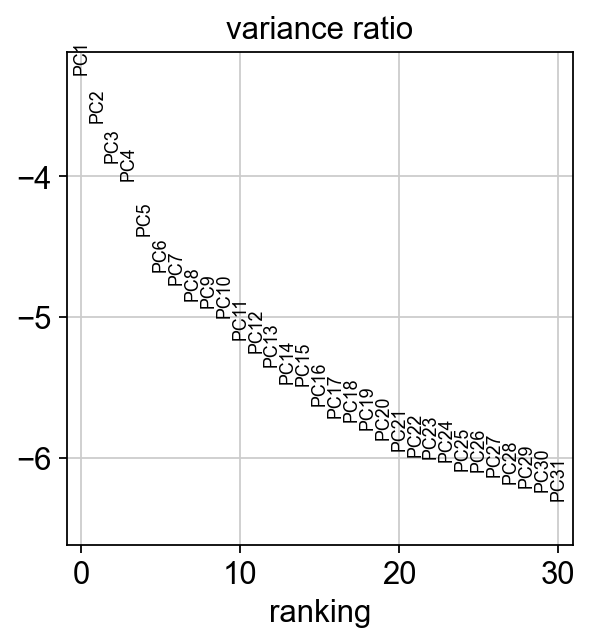

In [18]:
sc.pl.pca_variance_ratio(adata, log=True)

In [18]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=1.2)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:43)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:20)
running Leiden clustering
    finished: found 40 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:12)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


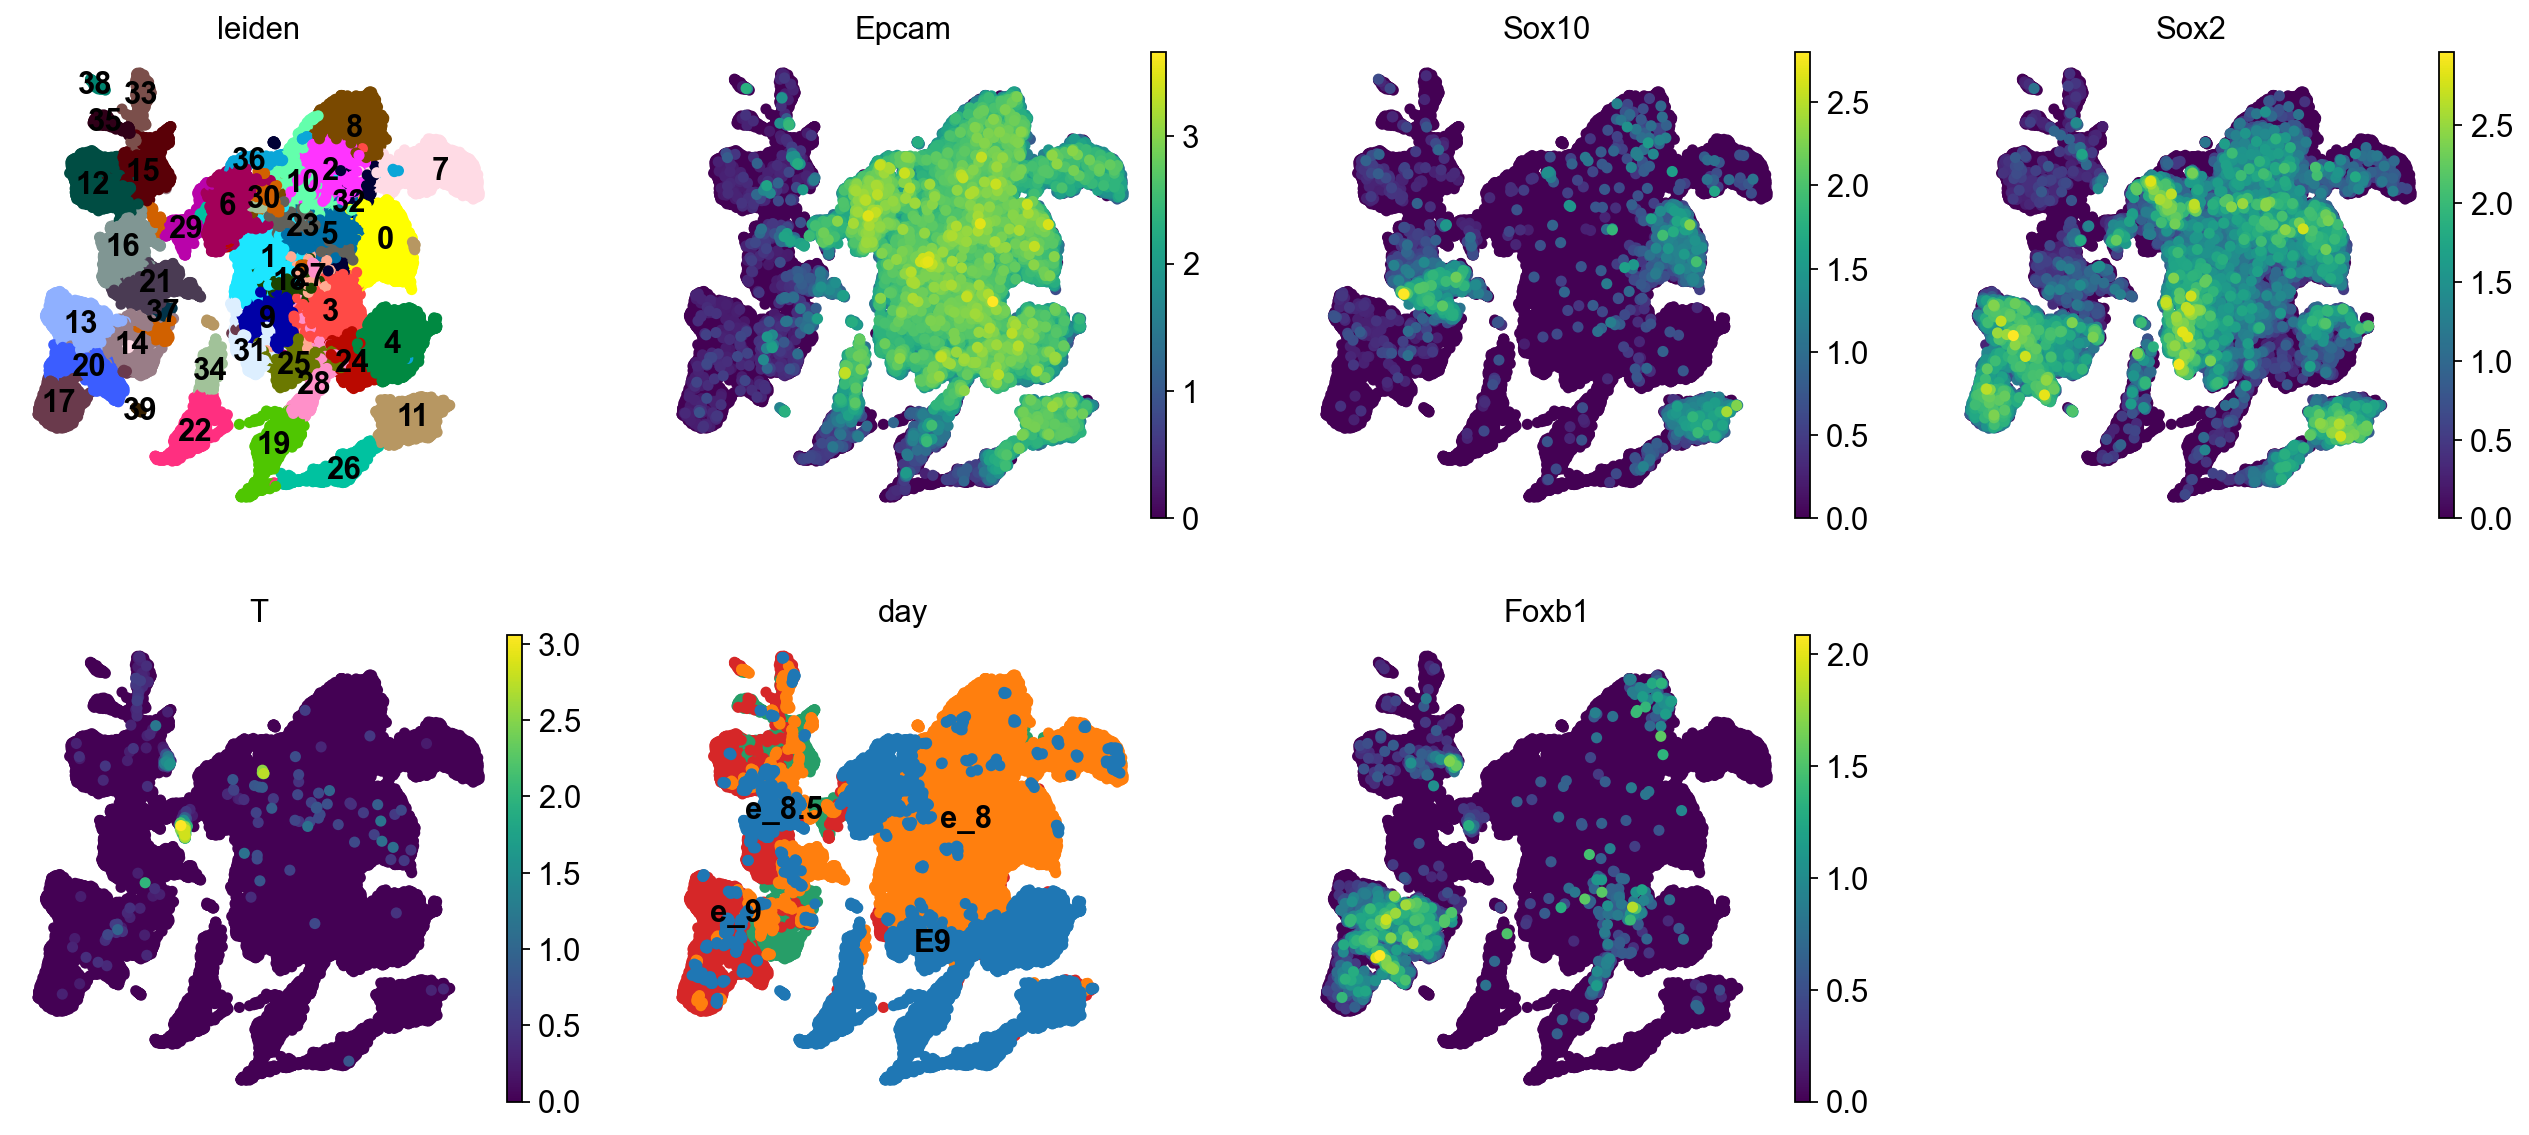

In [19]:
sc.pl.umap(adata, color=['leiden',  'Epcam','Sox10', 'Sox2', 'T', 'day' , 'Foxb1'], size=100, frameon=False, legend_loc='on data')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping

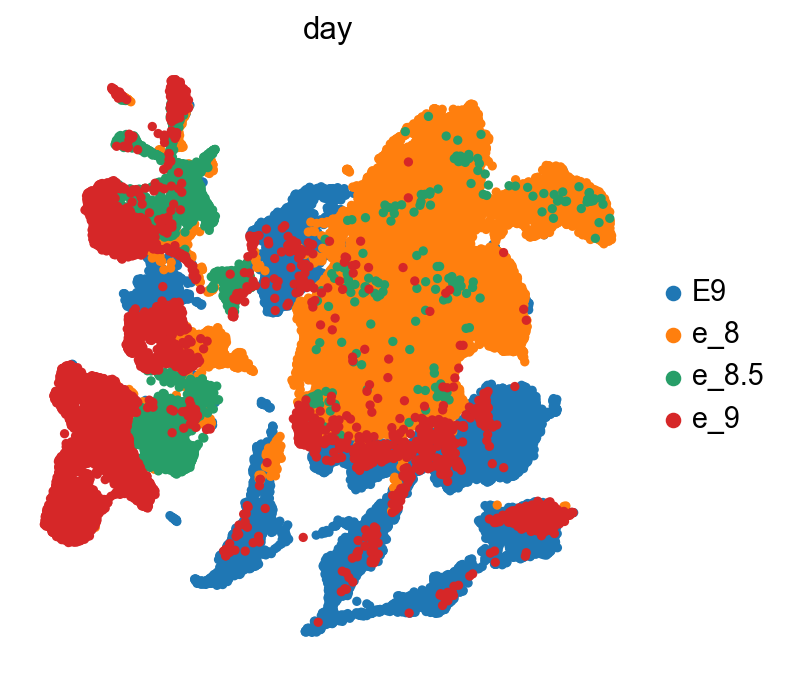

In [20]:
list(set(adata.obs.day))
ig, ax = plt.subplots(figsize=(5, 5))
 
s = 120000 / len(adata) * 4
sc.pl.umap(adata, color="day", frameon=False, ax=ax, show=False, s=s)
 
groups = ['E9', 'e_8', 'e_8.5', 'e_9']
for group in groups:
     sc.pl.umap(adata[adata.obs.day == group], color="day", frameon=False, ax=ax, show=False,legend_loc=None, size=70)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping

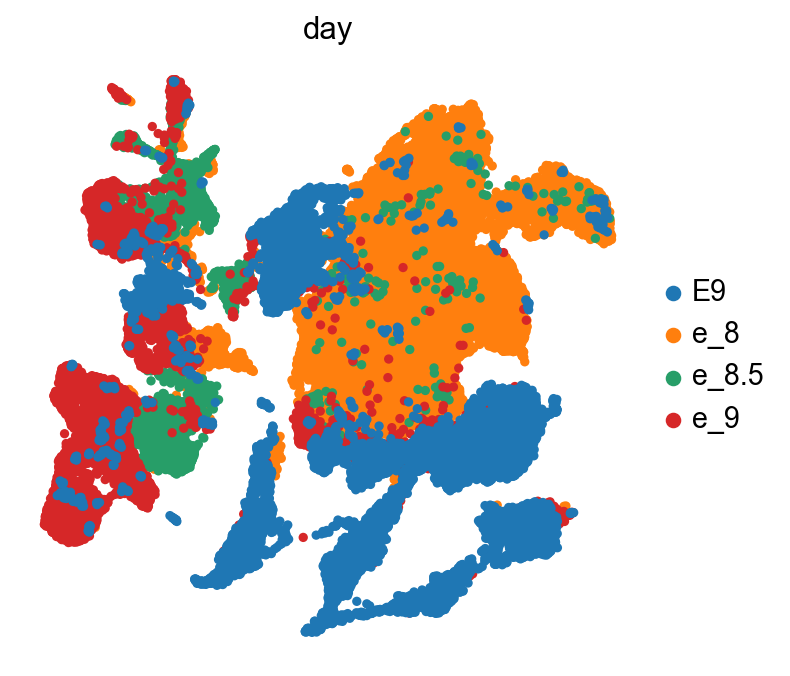

In [21]:
list(set(adata.obs.day))
ig, ax = plt.subplots(figsize=(5, 5))
 
s = 120000 / len(adata) * 4
sc.pl.umap(adata, color="day", frameon=False, ax=ax, show=False, s=s)
 
groups = [ 'e_8', 'e_8.5', 'e_9', 'E9']
for group in groups:
     sc.pl.umap(adata[adata.obs.day == group], color="day", frameon=False, ax=ax, show=False,legend_loc=None, size=70)

In [22]:
adata=adata.raw.to_adata()

In [23]:
adata.write('/home/julia/data/placodes/h5ad/11_umap__all.h5ad')